In [16]:
# Pythonの挙動を整えるライブラリのインポート
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

In [17]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2278847554157562301]

In [18]:
print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


# Kerasでクラス分類

1. データの準備
2. モデルを宣言
3. モデルの学習

### データの読み込み

In [19]:
import pandas as pd #表データの取り扱い
import numpy as np #数値計算
import matplotlib.pyplot as plt #グラフの描画
%matplotlib inline

In [20]:
# データの読み込み
df = pd.read_csv("data/wine_class.csv") #dataFrame

In [21]:
df.head(10) #どんなデータが入っているかを確認 


,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185
3,1,14.37,2.50,16.8,113,3.85,3.49,0.24,7.80,0.86,1480
4,1,13.24,2.87,21.0,118,2.80,2.69,0.39,4.32,1.04,735
5,1,14.20,2.45,15.2,112,3.27,3.39,0.34,6.75,1.05,1450
6,1,14.39,2.45,14.6,96,2.50,2.52,0.30,5.25,1.02,1290
7,1,14.06,2.61,17.6,121,2.60,2.51,0.31,5.05,1.06,1295
8,1,14.83,2.17,14.0,97,2.80,2.98,0.29,5.20,1.08,1045
9,1,13.86,2.27,16.0,98,2.98,3.15,0.22,7.22,1.01,1045


# 教師データと入力データへの切り分け

In [22]:
t = df.iloc[:,0]
x = df.iloc[:,1:]

In [23]:
x.head(1)

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.8,3.06,0.28,5.64,1.04,1065


In [24]:
df.shape

(178, 11)

In [25]:
x.shape #分割できてるかの確認

(178, 10)

### Kerasで計算できるデータの形式に変換
 - 入力変数、教師データがNumpy形式
 - 分類の場合は、ラベルが0から始まっていること

In [26]:
# データ型の確認
type(x) ##>>pandas形式

pandas.core.frame.DataFrame

# Numpyにデータ型を変換し、ラベルを0から始める

In [28]:
t.values-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [31]:
x = x.values ##.valuesがなむぱい形式
t = t.values-1

In [36]:
type(x)

numpy.ndarray

In [33]:
type(t)

numpy.ndarray

### 訓練データとテストデータの分割　（7年分で訓練してコツをつかんで、3年分で通用するかを傾向を探る）

In [91]:
from sklearn.model_selection import train_test_split

In [1]:
# 訓練データと検証データに切り分け



train_x, val_x, train_t, val_t = train_test_split(x, t, train_size=0.7, random_state=0)

NameError: name 'train_test_split' is not defined

In [93]:
train_x.shape

(124, 10)

# シードの固定

In [94]:
import os
import random


def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

### ニューラルネットワークのモデルの定義
1. keras.Sequential()を用意する。(層を格納するための箱)
2. layers.全結合層を箱に追加する。

In [95]:
from tensorflow.keras import models,layers #モデルズはモデルを扱う、レイヤーズは層を扱う

In [98]:
#シードの固定
reset_seed(0)

#モデルのインスタンス化(そうを格納するための箱を用意)
model = models.Sequential()

#モデルの構築
model.add(layers.BatchNormalization(input_shape=(10,)))
model.add(layers.Dense(5, activation='relu', input_shape=(10,)))
# model.add(layers.Dense(5, input_shape=(10,))) #入力層のノードの数
#model.add(layers.Dense(5, activation='relu', input_shape=(10,))) でもOK!!
# model.add(layers.Activation('relu')) #Activation:活性化
model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) #確率を出力するためにソフトマックスを扱う. （クラスはreru）
# model.add(layers.Dense(3, activation='Softmax'))でもOK!!

## モデルのコンパイル(設定)

In [99]:
model.compile(optimizer='SGD',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] #accuracyを表示させるかどうか.
             )

In [100]:
# モデルの学習
history = model.fit(train_x, train_t,
          batch_size=10,
          epochs=50,
          verbose=1,#　logを見るかどうか
          validation_data=(val_x, val_t))

Train on 124 samples, validate on 54 samples
Epoch 1/50
124/124 [==============================] - 0s 3ms/sample - loss: 1.4536 - accuracy: 0.4274 - val_loss: 8.1839 - val_accuracy: 0.4074
Epoch 2/50
124/124 [==============================] - 0s 351us/sample - loss: 1.2246 - accuracy: 0.4597 - val_loss: 4.7574 - val_accuracy: 0.4074
Epoch 3/50
124/124 [==============================] - 0s 343us/sample - loss: 1.0559 - accuracy: 0.5484 - val_loss: 3.0962 - val_accuracy: 0.3889
Epoch 4/50
124/124 [==============================] - 0s 360us/sample - loss: 0.9178 - accuracy: 0.5645 - val_loss: 2.2497 - val_accuracy: 0.3704
Epoch 5/50
124/124 [==============================] - 0s 386us/sample - loss: 0.9087 - accuracy: 0.5887 - val_loss: 1.7877 - val_accuracy: 0.3889
Epoch 6/50
124/124 [==============================] - 0s 344us/sample - loss: 0.8316 - accuracy: 0.6452 - val_loss: 1.4649 - val_accuracy: 0.3704
Epoch 7/50
124/124 [==============================] - 0s 391us/sample - loss: 0.7

In [101]:
# -lossの値が下がってないからちょっとおかしいかも

In [102]:
#学習結果をPandasのDataFrame型で読み込む
type(history.history)

results = pd.DataFrame(history.history)

In [103]:
results

,loss,accuracy,val_loss,val_accuracy
0,1.453626,0.427419,8.183857,0.407407
1,1.224581,0.459677,4.757411,0.407407
2,1.055917,0.548387,3.096191,0.388889
3,0.917832,0.564516,2.249741,0.370370
4,0.908750,0.588710,1.787659,0.388889
5,0.831598,0.645161,1.464932,0.370370
6,0.754668,0.717742,1.281094,0.296296
7,0.799424,0.637097,1.150466,0.351852
8,0.693721,0.750000,1.054261,0.388889
9,0.637507,0.798387,1.000988,0.425926


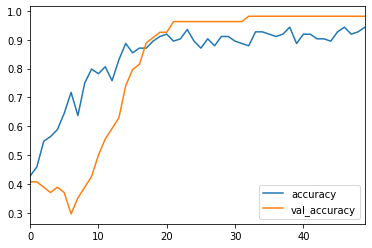

In [105]:
# accuracy(精度)を表示
results[['accuracy', 'val_accuracy']].plot()

In [106]:
# 青が訓練データなのにオレンジのほう(検証データ)が結果が良くなるからおかしい

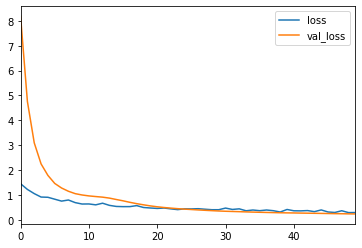

In [107]:
# loss(損失度合い)を表示
results[['loss', 'val_loss']].plot()